In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import seaborn as sn

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/datasets/Dataset_back_pain.csv')
print('import done')

import done


In [ ]:
dataset.shape

(310, 13)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Col1       310 non-null    float64
 1   Col2       310 non-null    float64
 2   Col3       310 non-null    float64
 3   Col4       310 non-null    float64
 4   Col5       310 non-null    float64
 5   Col6       310 non-null    float64
 6   Col7       310 non-null    float64
 7   Col8       310 non-null    float64
 8   Col9       310 non-null    float64
 9   Col10      310 non-null    float64
 10  Col11      310 non-null    float64
 11  Col12      310 non-null    float64
 12  Class_att  310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


## Splitting dataset by dependencies

In [ ]:
X = dataset.drop(['Class_att'],axis=1)
Y = dataset['Class_att']

## Finding missing value

In [ ]:
dataset_missing = X.isna()
dataset_missing.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
dataset_missing.dtypes

Col1     bool
Col2     bool
Col3     bool
Col4     bool
Col5     bool
Col6     bool
Col7     bool
Col8     bool
Col9     bool
Col10    bool
Col11    bool
Col12    bool
dtype: object

In [ ]:
dataset_num_missing = dataset_missing.sum()
dataset_num_missing

Col1     0
Col2     0
Col3     0
Col4     0
Col5     0
Col6     0
Col7     0
Col8     0
Col9     0
Col10    0
Col11    0
Col12    0
dtype: int64

In [ ]:
dataset_num_missing / len(dataset)

Col1     0.0
Col2     0.0
Col3     0.0
Col4     0.0
Col5     0.0
Col6     0.0
Col7     0.0
Col8     0.0
Col9     0.0
Col10    0.0
Col11    0.0
Col12    0.0
dtype: float64

## Impute missing value By KNN

In [ ]:
from sklearn.impute import KNNImputer
knnimp = KNNImputer(n_neighbors = 5)

In [ ]:
num = [col for col in X.columns if dataset[col].dtypes != 'O']

In [ ]:
X[num].head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171


In [ ]:
knnimp.fit(X[num])

KNNImputer()

In [ ]:
X[num]  = knnimp.transform(X[num])

In [ ]:
X.isna().sum()

Col1     0
Col2     0
Col3     0
Col4     0
Col5     0
Col6     0
Col7     0
Col8     0
Col9     0
Col10    0
Col11    0
Col12    0
dtype: int64

## Feature Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(Y)

LabelEncoder()

In [ ]:
le.classes_

array(['Abnormal', 'Normal'], dtype=object)

In [ ]:
Y = le.transform(Y)

In [ ]:
obj = [col for col in X.columns if dataset[col].dtypes == 'O']
X[obj]

""
0
1
2
3
4
...
305
306
307
308


In [ ]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Feature transformation or Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X

array([[ 0.14708636,  0.50136873, -0.6651769 , ...,  1.1671291 ,
        -1.19658726,  1.71236843],
       [-1.24586434, -0.74876898, -1.45300075, ...,  1.67955123,
        -0.94032533, -0.91394145],
       [ 0.4843695 ,  0.46793218, -0.09926175, ...,  1.63596949,
        -1.22717809, -0.61568643],
       ...,
       [ 0.05520137,  0.51561812, -0.31097748, ..., -1.05158278,
         1.44337397, -0.69303204],
       [-0.88582307, -0.88565951, -0.55861259, ..., -0.75264852,
         1.62384854,  0.77376463],
       [-1.54892681, -1.24785954, -0.82539423, ...,  0.62174631,
         1.29742294,  1.43371339]])

## Handling Imbalanced Dataset

Text(0, 0.5, 'No of patients')

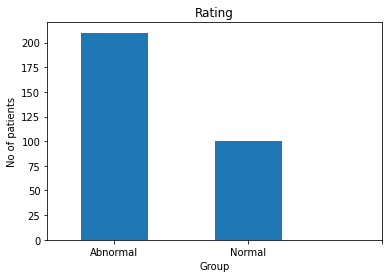

In [ ]:
count_classes = pd.value_counts(dataset['Class_att'])
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Rating")
plt.xticks(range(3))
plt.xlabel("Group")
plt.ylabel("No of patients")

In [ ]:
nondemented = Y[Y== 1]
demented = Y[Y== 0]

In [ ]:
print(nondemented.shape, demented.shape)

(100,) (210,)


## SMOTE Sampling

In [ ]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 10)

In [ ]:
X,Y = smk.fit_resample(X,Y)

In [ ]:
X.shape,Y.shape

((412, 12), (412,))

## Feature Correlation and Dimension Reduction(LDA)

In [ ]:
from sklearn.preprocessing import Normalizer
X = Normalizer().fit_transform(X)
X = pd.DataFrame(X)

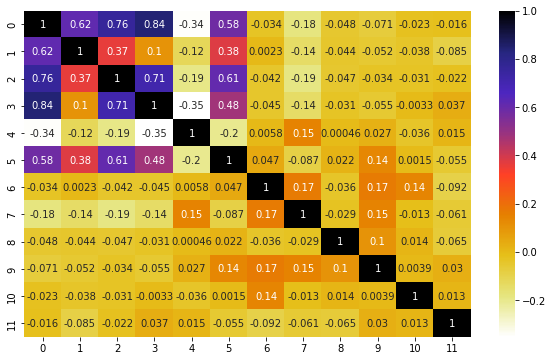

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components =-1 )
X = lda.fit_transform(X,Y)

## Splitting dataset into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

## Import libraries and Function

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
import seaborn as sns

In [ ]:
def cvresult(y,pred):
  print('Cross Val f1 score : ',f1_score(y,pred))
  print('Cross Val Precision : ',precision_score(y,pred))
  print('Cross Val recall : ',recall_score(y,pred))
  print('Cross Val Classification Report : \n',classification_report(y,pred))

In [ ]:
def result(y,p):
  print('Accuracy : ',accuracy_score(y,p))
  print('f1 score : ',f1_score(y,p))
  print('Precision : ',precision_score(y,p))
  print('recall : ',recall_score(y,p))
  print('Classification Report : \n',classification_report(y,p))

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

## K-Fold Validation Import

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
def Kfold_result(X,Y,model,foldnum):
   print("\ncross validation")
   from sklearn.model_selection import cross_val_score, cross_validate,cross_val_predict
   from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
   scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}

   results = cross_validate(estimator=model,
                                          X=X,
                                          y=Y,
                                          cv=10,
                                          scoring=scoring)
   print('cross accuracy:',np.mean(results['test_accuracy']))
   print('cross precision:',np.mean(results['test_precision']))
   print('cross recall:',np.mean(results['test_recall']))
   print('cross f1 score:', np.mean(results['test_f1_score']))
   cross_pred_test = cross_val_predict(model,X,Y,cv = 10)
   cm = confusion_matrix(Y,cross_pred_test)
   group_names = ['','','','']
   group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
   group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
   labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
   labels = np.asarray(labels).reshape(2,2)
   sns.heatmap(cm, annot=labels, fmt='', cmap='Purples')

   pass

## Import Classifier Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier

# Hyper Parameter Tuning

###  Random search Grid search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

### Linear Regression Random Search

In [ ]:
rs = RandomizedSearchCV(LogisticRegression(solver='liblinear',multi_class='auto'),{ 'C' : [1,5,10]}, cv = 10,return_train_score=False, n_iter=2)
rs.fit(X,Y)
best_paramlr = rs.best_params_
pd.DataFrame(rs.cv_results_)[['param_C','mean_test_score']]
print(best_paramlr)

{'C': 1}


###KNN Random Search

In [ ]:
rs = RandomizedSearchCV(KNeighborsClassifier(), {
            'leaf_size' : [1,5,10,15,20,50],
            'n_neighbors' : [1,5,10,15],
            'p' : [1,2,3]
        })
rs.fit(X,Y)
best_paramknn = rs.best_params_
pd.DataFrame(rs.cv_results_)[['param_leaf_size','param_n_neighbors','param_p','mean_test_score']]
print(best_paramknn)

{'p': 2, 'n_neighbors': 1, 'leaf_size': 10}


### SVM Random Search

In [ ]:
srs = RandomizedSearchCV(SVC(gamma='auto'),
            {
            'C' : [1,5,10,20,50],
            'kernel': ['rbf','linear']
        })
srs.fit(X,Y)
best_params = srs.best_params_
pd.DataFrame(srs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.847811
1,1,linear,0.833324
2,5,rbf,0.864737
3,5,linear,0.838113
4,10,rbf,0.881663
5,10,linear,0.840552
6,20,rbf,0.881693
7,20,linear,0.840552
8,50,rbf,0.891390
9,50,linear,0.842933


### Naive Bayes Random Search

In [ ]:
nbrs = RandomizedSearchCV(GaussianNB(),
            {
            'var_smoothing' : [0.01,0.02,0.026,0.0265,0.0258,0.03]
        })
nbrs.fit(X,Y)
best_paramnb = nbrs.best_params_
pd.DataFrame(nbrs.cv_results_)[['param_var_smoothing','mean_test_score']]
print(best_paramnb)

{'var_smoothing': 0.01}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


### Decision tree Random Search

In [ ]:
dtrs = RandomizedSearchCV(DecisionTreeClassifier(),{
            'splitter':['best','random'],
            'max_depth' : [1,3,5],
            'min_samples_leaf':[1,2,3,4,5],
            'max_features':['auto','log2','sqrt',None],
            'max_leaf_nodes':[None,10,20,30,40,50,60,70,80,90]
        })
dtrs.fit(X,Y)
best_paramdt = dtrs.best_params_
pd.DataFrame(dtrs.cv_results_)[['param_splitter','param_max_depth','param_min_samples_leaf','param_max_features','param_max_leaf_nodes','mean_test_score']]

,param_splitter,param_max_depth,param_min_samples_leaf,param_max_features,param_max_leaf_nodes,mean_test_score
0,random,1,3,auto,30,0.573230
1,random,5,4,None,10,0.765148
2,random,3,5,sqrt,50,0.611960
3,best,3,1,None,30,0.826036
4,random,3,2,None,50,0.792242
5,best,5,4,auto,80,0.784484
6,best,3,4,sqrt,30,0.828416
7,best,1,2,auto,80,0.629033
8,random,3,4,auto,20,0.670555
9,random,5,3,None,60,0.774904


### Random Forest Random Search

In [ ]:
rfrs = RandomizedSearchCV(RandomForestClassifier(),{
            'bootstrap': [True],
            'max_depth': [5, 10, None],
            'max_features': ['auto', 'log2'],
            'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]
        })
rfrs.fit(X,Y)
best_paramrf = rfrs.best_params_
pd.DataFrame(rfrs.cv_results_)[['param_bootstrap','param_max_depth','param_max_features','param_n_estimators','mean_test_score']]

,param_bootstrap,param_max_depth,param_max_features,param_n_estimators,mean_test_score
0,True,None,auto,11,0.859947
1,True,10,log2,10,0.864678
2,True,10,auto,15,0.884161
3,True,10,log2,15,0.876932
4,True,5,log2,6,0.886629
5,True,None,log2,9,0.864766
6,True,None,auto,8,0.884190
7,True,5,auto,10,0.855216
8,True,5,auto,5,0.845489
9,True,10,log2,6,0.859771


### Extra Tree Random Search

In [ ]:
etrs = RandomizedSearchCV(ExtraTreeClassifier(),{
            'criterion': ['gini','entropy'],
            'max_depth': [i for i in range(1,50,1)],
            'max_features': ['auto', 'log2','sqrt']
        })
etrs.fit(X,Y)
best_paramet = etrs.best_params_
pd.DataFrame(etrs.cv_results_)[['param_criterion','param_max_depth','param_max_features',
                              'mean_test_score']]

,param_criterion,param_max_depth,param_max_features,mean_test_score
0,entropy,8,auto,0.745724
1,entropy,14,sqrt,0.782251
2,gini,8,log2,0.784690
3,entropy,33,auto,0.777402
4,gini,49,sqrt,0.748281
5,gini,28,sqrt,0.774758
6,gini,44,auto,0.767529
7,gini,6,auto,0.660858
8,entropy,19,log2,0.825742
9,entropy,45,log2,0.760359


# Find best parameters

In [ ]:
model_params = {
    'logistic_regression' :{
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C' : [1,5,10,20,50]
        }
    },
    'KNN' :{
        'model': KNeighborsClassifier(),
        'params': {
            'leaf_size' : [1,5,10,15,20,50],
            'n_neighbors' : [1,5,10,15],
            'p' : [1,2,3]
        }
    },
    'SVM' :{
        'model': SVC(gamma='auto'),
        'params': {
            'C' : [1,5,10,20,50],
            'kernel': ['rbf','linear']
        }
    },
    'Naive Bayes' :{
        'model': GaussianNB(),
        'params': {
            'var_smoothing' : [0.01,0.02,0.026,0.0265,0.0258,0.03]
        }
    },
    'Decision Tree' :{
        'model': DecisionTreeClassifier(),
        'params': {
            'splitter':['best','random'],
            'max_depth' : [1,3,5],
            'min_samples_leaf':[1,2,3,4,5],
            'max_features':['auto','log2','sqrt',None],
            'max_leaf_nodes':[None,10,20,30,40,50,60,70,80,90]
        }
    },
    'Random Forest' :{
        'model': RandomForestClassifier(),
        'params': {
            'bootstrap': [True],
            'max_depth': [5, 10, None],
            'max_features': ['auto', 'log2'],
            'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]
        }
    }
}

In [ ]:
scores = []
for model_name,mp in model_params.items():
  clf= GridSearchCV(mp['model'],mp['params'],cv=10, return_train_score=False)
  clf.fit(X_train,Y_train)
  scores.append({
      'model' : model_name,
      'best_score' : clf.best_score_,
      'best_params' : clf.best_params_

  })

In [ ]:
df = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,logistic_regression,0.845161,{'C': 1}
1,KNN,0.867742,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 3}"
2,SVM,0.900000,"{'C': 50, 'kernel': 'rbf'}"
3,Naive Bayes,0.835484,{'var_smoothing': 0.01}
4,Decision Tree,0.861290,"{'max_depth': 5, 'max_features': 'sqrt', 'max_..."
5,Random Forest,0.903226,"{'bootstrap': True, 'max_depth': None, 'max_fe..."


# Traditional Algorithm

##Logistic Regression

In [ ]:
classifier = LogisticRegression(random_state=42,C=best_paramlr['C'])
classifier.fit(X, Y)

LogisticRegression(C=1, random_state=42)

In [ ]:
r_prob = [0 for _ in range(len(Y_test))]

In [ ]:
Y_predlr = classifier.predict(X_test)

In [ ]:
ytest_pred = classifier.predict_proba(X_test)
lr_prob = classifier.predict_proba(X_test)

In [ ]:
Y_cvpredlr = cross_val_predict(classifier, X, Y, cv=10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predlr)
print(cm)

[[43 10]
 [ 2 48]]


In [ ]:
cm = confusion_matrix(Y,Y_cvpredlr)
print(cm)

[[161  45]
 [ 17 189]]


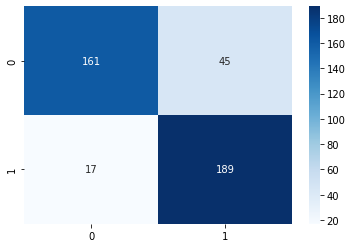

In [ ]:
labels = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(classifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.5952381  0.64285714 0.63414634 0.90243902 0.95121951 0.95121951
 0.92682927 0.97560976 0.95121951 0.97560976]

Cross Val Accuracy : 0.8506387921022067


In [ ]:
cvresult(Y,Y_cvpredlr)

Cross Val f1 score :  0.8590909090909091
Cross Val Precision :  0.8076923076923077
Cross Val recall :  0.9174757281553398
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.78      0.84       206
           1       0.81      0.92      0.86       206

    accuracy                           0.85       412
   macro avg       0.86      0.85      0.85       412
weighted avg       0.86      0.85      0.85       412



In [ ]:
result(Y_test,Y_predlr)

Accuracy :  0.883495145631068
f1 score :  0.888888888888889
Precision :  0.8275862068965517
recall :  0.96
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.81      0.88        53
           1       0.83      0.96      0.89        50

    accuracy                           0.88       103
   macro avg       0.89      0.89      0.88       103
weighted avg       0.89      0.88      0.88       103



In [ ]:
lr_auc = roc_auc_score(Y_test,lr_prob[:,1])
print('roc-auc score :{}'.format(lr_auc))

roc-auc score :0.9411320754716981


##K-NN

In [ ]:
import math
math.sqrt(len(Y_test))

10.198039027185569

In [ ]:
kclassifier = KNeighborsClassifier(n_neighbors = 5, p=best_paramknn['p'],leaf_size=best_paramknn['leaf_size'], metric = 'euclidean')
kclassifier.fit(X,Y)

KNeighborsClassifier(leaf_size=10, metric='euclidean')

In [ ]:
Y_predk = kclassifier.predict(X_test)

In [ ]:
Y_cvpredk = cross_val_predict(kclassifier, X, Y, cv=10)

In [ ]:
ytest_pred = kclassifier.predict_proba(X_test)
knn_prob = kclassifier.predict_proba(X_test)

In [ ]:
cmk = confusion_matrix(Y_test,Y_predk)
print(cmk)

[[44  9]
 [ 0 51]]


In [ ]:
cmk = confusion_matrix(Y,Y_cvpredk)
print(cmk)

[[138  69]
 [  9 198]]


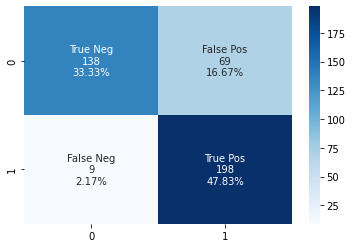

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmk.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmk.flatten()/np.sum(cmk)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmk, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(kclassifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.54761905 0.61904762 0.61904762 0.88095238 0.85365854 0.90243902
 0.92682927 0.87804878 0.95121951 0.95121951]

Cross Val Accuracy : 0.8130081300813009


In [ ]:
cvresult(Y,Y_cvpredk)

Cross Val f1 score :  0.8354430379746837
Cross Val Precision :  0.7415730337078652
Cross Val recall :  0.9565217391304348
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.67      0.78       207
           1       0.74      0.96      0.84       207

    accuracy                           0.81       414
   macro avg       0.84      0.81      0.81       414
weighted avg       0.84      0.81      0.81       414



In [ ]:
result(Y_test,Y_predk)

Accuracy :  0.9134615384615384
f1 score :  0.9189189189189189
Precision :  0.85
recall :  1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.83      0.91        53
           1       0.85      1.00      0.92        51

    accuracy                           0.91       104
   macro avg       0.93      0.92      0.91       104
weighted avg       0.93      0.91      0.91       104



In [ ]:
knn_auc = roc_auc_score(Y_test,knn_prob[:,1])
print('roc-auc score :{}'.format(knn_auc))

roc-auc score :0.9829818719940806


##SVM

In [ ]:
sclassifier = SVC(kernel = best_params['kernel'],random_state = 42,C=best_params['C'], probability=True)
sclassifier.fit(X,Y)

SVC(C=50, probability=True, random_state=42)

In [ ]:
Y_preds = sclassifier.predict(X_test)

In [ ]:
ytest_pred = sclassifier.predict_proba(X_test)
svm_prob = sclassifier.predict_proba(X_test)

In [ ]:
Y_cvpreds = cross_val_predict(sclassifier, X, Y, cv=10)

In [ ]:
cms = confusion_matrix(Y_test,Y_preds)
print(cms)

[[53  0]
 [ 0 50]]


In [ ]:
cms = confusion_matrix(Y,Y_cvpreds)
print(cms)

[[171  35]
 [  6 200]]


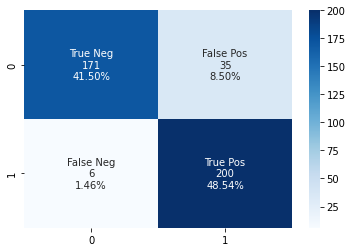

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cms.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cms.flatten()/np.sum(cms)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cms, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(sclassifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.73809524 0.73809524 0.80487805 0.87804878 0.92682927 0.97560976
 0.97560976 0.97560976 1.         1.        ]

Cross Val Accuracy : 0.9012775842044135


In [ ]:
cvresult(Y,Y_cvpreds)

Cross Val f1 score :  0.9070294784580499
Cross Val Precision :  0.851063829787234
Cross Val recall :  0.970873786407767
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.83      0.89       206
           1       0.85      0.97      0.91       206

    accuracy                           0.90       412
   macro avg       0.91      0.90      0.90       412
weighted avg       0.91      0.90      0.90       412



In [ ]:
result(Y_test,Y_preds)

Accuracy :  1.0
f1 score :  1.0
Precision :  1.0
recall :  1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



In [ ]:
svm_auc = roc_auc_score(Y_test,svm_prob[:,1])
print('roc-auc score :{}'.format(svm_auc))

roc-auc score :1.0


##kernel SVM

In [ ]:
ksclassifier = SVC(kernel = 'linear',C=1,random_state = 0, probability=True)
ksclassifier.fit(X,Y)

SVC(C=1, kernel='linear', probability=True, random_state=0)

In [ ]:
Y_predks = ksclassifier.predict(X_test)

In [ ]:
 ytest_pred = ksclassifier.predict_proba(X_test)
 ksvm_prob = ksclassifier.predict_proba(X_test)

In [ ]:
Y_cvpredks = cross_val_predict(ksclassifier, X, Y, cv=10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predks)
print(cm)

[[45  8]
 [ 3 48]]


In [ ]:
cmks = confusion_matrix(Y,Y_cvpredks)
print(cmks)

[[158  49]
 [ 18 189]]


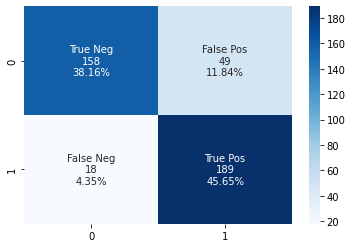

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmks.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmks.flatten()/np.sum(cmks)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmks, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(ksclassifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.5952381  0.5952381  0.61904762 0.9047619  0.95121951 0.95121951
 0.92682927 1.         0.90243902 0.95121951]

Cross Val Accuracy : 0.8397212543554007


In [ ]:
cvresult(Y,Y_cvpredks)

Cross Val f1 score :  0.8494382022471909
Cross Val Precision :  0.7941176470588235
Cross Val recall :  0.9130434782608695
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.76      0.83       207
           1       0.79      0.91      0.85       207

    accuracy                           0.84       414
   macro avg       0.85      0.84      0.84       414
weighted avg       0.85      0.84      0.84       414



In [ ]:
result(Y_test,Y_predks)

Accuracy :  0.8942307692307693
f1 score :  0.897196261682243
Precision :  0.8571428571428571
recall :  0.9411764705882353
Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.85      0.89        53
           1       0.86      0.94      0.90        51

    accuracy                           0.89       104
   macro avg       0.90      0.90      0.89       104
weighted avg       0.90      0.89      0.89       104



In [ ]:
ksvm_auc = roc_auc_score(Y_test,ksvm_prob[:,1])
print('roc-auc score :{}'.format(ksvm_auc))

roc-auc score :0.9500554938956715


## Naive Bays

In [ ]:
nbclassifier = GaussianNB(var_smoothing=best_paramnb['var_smoothing'])
nbclassifier.fit(X,Y)

GaussianNB(var_smoothing=0.01)

In [ ]:
Y_prednb = nbclassifier.predict(X_test)

In [ ]:
ytest_pred = nbclassifier.predict_proba(X_test)
nb_prob = nbclassifier.predict_proba(X_test)

In [ ]:
Y_cvprednb = cross_val_predict(nbclassifier,X,Y,cv = 10)

In [ ]:
cms = confusion_matrix(Y_test,Y_prednb)
print(cms)

[[35 18]
 [ 4 46]]


In [ ]:
cvcms = confusion_matrix(Y, Y_cvprednb)
print(cvcms)

[[153  53]
 [ 17 189]]


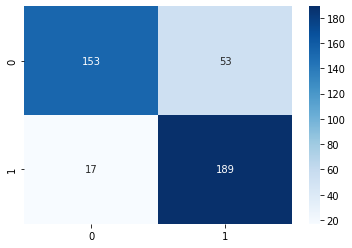

In [ ]:
labels = ["{0:0.0f}".format(value) for value in
                cvcms.flatten()]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cvcms, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(nbclassifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.52380952 0.54761905 0.51219512 0.95121951 0.97560976 0.95121951
 0.97560976 0.95121951 0.95121951 0.97560976]

Cross Val Accuracy : 0.8315331010452962


In [ ]:
cvresult(Y,Y_cvprednb)

Cross Val f1 score :  0.8437499999999999
Cross Val Precision :  0.78099173553719
Cross Val recall :  0.9174757281553398
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.74      0.81       206
           1       0.78      0.92      0.84       206

    accuracy                           0.83       412
   macro avg       0.84      0.83      0.83       412
weighted avg       0.84      0.83      0.83       412



In [ ]:
result(Y_test,Y_prednb)

Accuracy :  0.7864077669902912
f1 score :  0.8070175438596492
Precision :  0.71875
recall :  0.92
Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.66      0.76        53
           1       0.72      0.92      0.81        50

    accuracy                           0.79       103
   macro avg       0.81      0.79      0.78       103
weighted avg       0.81      0.79      0.78       103



In [ ]:
nb_auc = roc_auc_score(Y_test,nb_prob[:,1])
print('roc-auc score :{}'.format(nb_auc))

roc-auc score :0.8864150943396227


## Decision Tree

In [ ]:
dtclassifier = DecisionTreeClassifier(splitter=best_paramdt['splitter'],max_depth=best_paramdt['max_depth'],
                                      min_samples_leaf=best_paramdt['min_samples_leaf'],max_features=best_paramdt['max_features'],
                                      max_leaf_nodes=best_paramdt['max_leaf_nodes'], random_state = 42)
dtclassifier.fit(X,Y)

DecisionTreeClassifier(max_depth=3, max_features='sqrt', max_leaf_nodes=30,
                       min_samples_leaf=4, random_state=42)

In [ ]:
Y_preddt = dtclassifier.predict(X_test)

In [ ]:
ytest_pred = dtclassifier.predict_proba(X_test)
dt_prob = dtclassifier.predict_proba(X_test)

In [ ]:
Y_cvpreddt = cross_val_predict(dtclassifier,X,Y,cv = 10)

In [ ]:
cms = confusion_matrix(Y_test,Y_preddt)
print(cms)

[[43 10]
 [ 7 43]]


In [ ]:
cvcmsdt = confusion_matrix(Y, Y_cvpreddt)
print(cvcmsdt)

[[144  62]
 [ 47 159]]


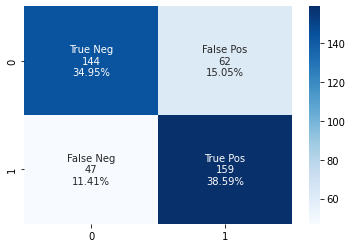

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cvcmsdt.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cvcmsdt.flatten()/np.sum(cvcmsdt)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cvcmsdt, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(dtclassifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.57142857 0.57142857 0.58536585 0.80487805 0.63414634 0.75609756
 0.82926829 0.92682927 0.90243902 0.7804878 ]

Cross Val Accuracy : 0.7362369337979093


In [ ]:
cvresult(Y,Y_cvpreddt)

Cross Val f1 score :  0.7447306791569087
Cross Val Precision :  0.7194570135746606
Cross Val recall :  0.7718446601941747
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.70      0.73       206
           1       0.72      0.77      0.74       206

    accuracy                           0.74       412
   macro avg       0.74      0.74      0.74       412
weighted avg       0.74      0.74      0.74       412



In [ ]:
result(Y_test,Y_preddt)

Accuracy :  0.8349514563106796
f1 score :  0.8349514563106797
Precision :  0.8113207547169812
recall :  0.86
Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.81      0.83        53
           1       0.81      0.86      0.83        50

    accuracy                           0.83       103
   macro avg       0.84      0.84      0.83       103
weighted avg       0.84      0.83      0.83       103



In [ ]:
dt_auc = roc_auc_score(Y_test,dt_prob[:,1])
print('roc-auc score :{}'.format(dt_auc))

roc-auc score :0.8784905660377358


## Random forest

In [ ]:
rfclassifier = RandomForestClassifier(n_estimators = best_paramrf['n_estimators'],bootstrap=best_paramrf['bootstrap'],
                                      max_depth=best_paramrf['max_depth'],
                                      max_features=best_paramrf['max_features'], random_state = 42)
rfclassifier.fit(X,Y)

RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=6,
                       random_state=42)

In [ ]:
Y_predrf = rfclassifier.predict(X_test)

In [ ]:
ytest_pred = rfclassifier.predict_proba(X_test)
rf_prob = rfclassifier.predict_proba(X_test)

In [ ]:
Y_cvpredrf = cross_val_predict(rfclassifier,X,Y,cv = 10)

In [ ]:
cms = confusion_matrix(Y_test,Y_predrf)
print(cms)

[[46  7]
 [ 1 49]]


In [ ]:
cvcmsrf = confusion_matrix(Y, Y_cvpredrf)
print(cvcmsrf)

[[163  43]
 [ 17 189]]


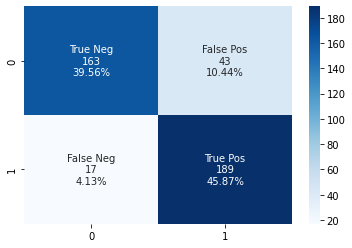

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cvcmsrf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cvcmsrf.flatten()/np.sum(cvcmsrf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cvcmsrf, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(rfclassifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.54761905 0.69047619 0.63414634 0.85365854 0.97560976 1.
 0.95121951 0.95121951 0.97560976 0.97560976]

Cross Val Accuracy : 0.8555168408826945


In [ ]:
cvresult(Y,Y_cvpredrf)

Cross Val f1 score :  0.863013698630137
Cross Val Precision :  0.8146551724137931
Cross Val recall :  0.9174757281553398
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.79      0.84       206
           1       0.81      0.92      0.86       206

    accuracy                           0.85       412
   macro avg       0.86      0.85      0.85       412
weighted avg       0.86      0.85      0.85       412



In [ ]:
result(Y_test,Y_predrf)

Accuracy :  0.9223300970873787
f1 score :  0.9245283018867924
Precision :  0.875
recall :  0.98
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.87      0.92        53
           1       0.88      0.98      0.92        50

    accuracy                           0.92       103
   macro avg       0.93      0.92      0.92       103
weighted avg       0.93      0.92      0.92       103



In [ ]:
rf_auc = roc_auc_score(Y_test,rf_prob[:,1])
print('roc-auc score :{}'.format(rf_auc))

roc-auc score :0.9762264150943396


## Extra Tree

In [ ]:
etclassifier = ExtraTreeClassifier(criterion=best_paramet['criterion'],max_depth=best_paramet['max_depth'],
                                   max_features=best_paramet['max_features'],random_state=42)
etclassifier.fit(X,Y)

ExtraTreeClassifier(criterion='entropy', max_depth=19, max_features='log2',
                    random_state=42)

In [ ]:
Y_predet = etclassifier.predict(X_test)

In [ ]:
ytest_pred = etclassifier.predict_proba(X_test)
et_prob = etclassifier.predict_proba(X_test)

In [ ]:
Y_cvpredet = cross_val_predict(etclassifier,X,Y,cv = 10)

In [ ]:
cms = confusion_matrix(Y_test,Y_predet)
print(cms)

[[52  1]
 [ 0 50]]


In [ ]:
cvcmset = confusion_matrix(Y, Y_cvpredet)
print(cvcmset)

[[159  47]
 [ 37 169]]


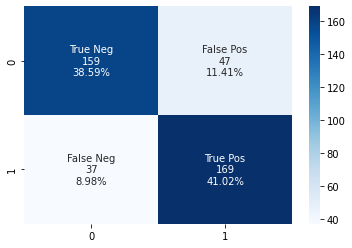

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cvcmset.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cvcmset.flatten()/np.sum(cvcmset)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cvcmset, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(etclassifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.66666667 0.64285714 0.63414634 0.90243902 0.7804878  0.92682927
 0.87804878 0.87804878 0.85365854 0.80487805]

Cross Val Accuracy : 0.7968060394889663


In [ ]:
cvresult(Y,Y_cvpredet)

Cross Val f1 score :  0.8009478672985781
Cross Val Precision :  0.7824074074074074
Cross Val recall :  0.8203883495145631
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.77      0.79       206
           1       0.78      0.82      0.80       206

    accuracy                           0.80       412
   macro avg       0.80      0.80      0.80       412
weighted avg       0.80      0.80      0.80       412



In [ ]:
result(Y_test,Y_predet)

Accuracy :  0.9902912621359223
f1 score :  0.99009900990099
Precision :  0.9803921568627451
recall :  1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.98      1.00      0.99        50

    accuracy                           0.99       103
   macro avg       0.99      0.99      0.99       103
weighted avg       0.99      0.99      0.99       103



In [ ]:
et_auc = roc_auc_score(Y_test,et_prob[:,1])
print('roc-auc score :{}'.format(et_auc))

roc-auc score :1.0


## ROC-AUC Curve

In [ ]:
pred = []
for model in [classifier, kclassifier, sclassifier, ksclassifier, nbclassifier, dtclassifier,rfclassifier] :
  pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction = pd.concat(pred,axis=1).mean(axis=1)
print('Final roc-auc score :{}'.format(roc_auc_score(Y_test,final_prediction)))

Final roc-auc score :0.9992600813910469


In [ ]:
pd.concat(pred,axis=1)

,0,1,2,3,4,5,6
0,0.666244,1.0,0.828458,0.722626,0.993031,0.850467,0.914336
1,0.016146,0.0,0.006163,0.009853,0.000030,0.000000,0.000000
2,0.752140,0.6,0.828422,0.749601,0.996622,0.850467,0.995951
3,0.797049,1.0,0.828355,0.789770,0.996566,0.850467,0.993204
4,0.669810,1.0,0.843506,0.666235,0.993695,0.850467,0.923077
...,...,...,...,...,...,...,...
99,0.562780,0.8,0.828462,0.561091,0.993016,0.850467,0.870330
100,0.963229,0.8,0.846488,0.976840,0.995830,0.850467,1.000000
101,0.893336,1.0,0.991054,0.926248,0.997809,0.850467,1.000000
102,0.962934,0.8,0.947869,0.967447,0.974456,0.850467,0.912315


In [ ]:
final_prediction

0      0.853595
1      0.004599
2      0.824744
3      0.893630
4      0.849541
         ...   
99     0.780878
100    0.918979
101    0.951273
102    0.916498
103    0.785380
Length: 104, dtype: float64

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, final_prediction)
thresholds

array([1.97273895e+00, 9.72738952e-01, 6.56454457e-01, 6.44146298e-01,
       6.42774035e-01, 1.19646324e-03])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_ls=[]
for thres in thresholds:
  y_pred = np.where(final_prediction>thres,1,0)
  accuracy_ls.append(accuracy_score(Y_test,y_pred, normalize=True))
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)], axis=1)
accuracy_ls.columns = ['Thresholds','Accuracy']
accuracy_ls.sort_values(by='Accuracy', ascending = False, inplace=True)
accuracy_ls.head()

,Thresholds,Accuracy
2,0.656454,0.980769
3,0.644146,0.980769
4,0.642774,0.971154
0,1.972739,0.509615
1,0.972739,0.509615


In [ ]:
def plot_roc_curve(fpr, tpr):
  plt.plot(fpr, tpr, color = 'red', label='ROC')
  plt.plot([0,1], [0,1], color= 'blue', linestyle='--' )
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC CURVE')
  plt.legend()
  plt.show()

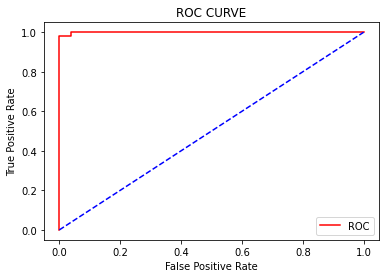

In [ ]:
plot_roc_curve(fpr, tpr)

In [ ]:
lr_fpr,lr_tpr,_ = roc_curve(Y_test,lr_prob[:,1])
svm_fpr,svm_tpr,_ = roc_curve(Y_test,svm_prob[:,1])
nb_fpr,nb_tpr,_ = roc_curve(Y_test,nb_prob[:,1])
dt_fpr,dt_tpr,_ = roc_curve(Y_test,dt_prob[:,1])
rf_fpr,rf_tpr,_ = roc_curve(Y_test,rf_prob[:,1])
et_fpr,et_tpr,_ = roc_curve(Y_test,et_prob[:,1])

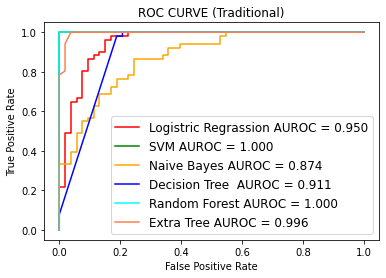

In [ ]:
plt.plot(lr_fpr, lr_tpr, color = 'red', linestyle='-',label='Logistric Regrassion AUROC = %0.3f'% lr_auc)
plt.plot(svm_fpr, svm_tpr, color = 'green', linestyle='-',label='SVM AUROC = %0.3f'% svm_auc)
plt.plot(nb_fpr, nb_tpr, color = 'orange', linestyle='-',label='Naive Bayes AUROC = %0.3f'% nb_auc)
plt.plot(dt_fpr, dt_tpr, color = 'blue', linestyle='-',label='Decision Tree  AUROC = %0.3f'% dt_auc)
plt.plot(rf_fpr, rf_tpr, color = 'cyan', linestyle='-',label='Random Forest AUROC = %0.3f'% rf_auc)
plt.plot(et_fpr, et_tpr, color = 'coral', linestyle='-',label='Extra Tree AUROC = %0.3f'% et_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE (Traditional)')
plt.legend(loc=4, prop={'size': 12})
plt.show()

# Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
estimators = [('SVM', sclassifier),('RF', rfclassifier)]
stackclassifier = StackingClassifier(estimators=estimators)


cross validation
cross accuracy: 0.9133565621370499
cross precision: 0.8969913900040941
cross recall: 0.9507142857142856
cross f1 score: 0.9200832694437345


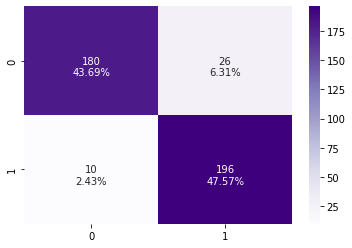

In [ ]:
Kfold_result(X,Y,stackclassifier,10)

In [ ]:
# AUC
from sklearn.metrics import roc_auc_score, roc_curve
stackclassifier.fit(X,Y)
st_probs_y = stackclassifier.predict_proba(X)
st_auc_y = roc_auc_score(Y, st_probs_y[:,1])
st_fpr, st_tpr, threshold = roc_curve(Y,st_probs_y[:,1])
print(st_auc_y)

1.0


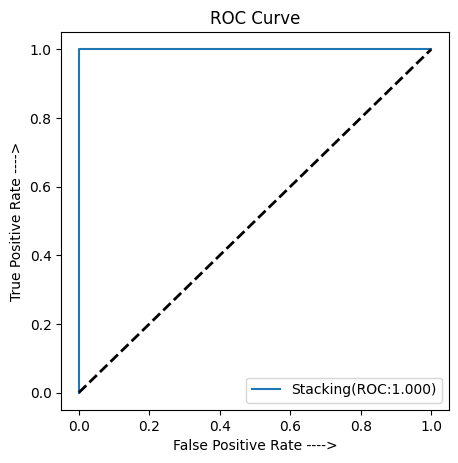

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

plt.figure(figsize=(5,5),dpi = 100)
plt.plot(st_fpr,st_tpr,linestyle='-',label='Stacking(ROC:%0.3f)' % st_auc_y)
lw=2
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate ---->")
plt.ylabel("True Positive Rate ---->")
plt.legend()
plt.show()

#Hard Ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier
eclfh = VotingClassifier(estimators=[('LRmodel', classifier), ('SVM', sclassifier), ('rf', rfclassifier)],voting='hard')

for clf, label in zip([classifier, sclassifier, rfclassifier, eclfh], ['LR Classifier', 'SVM', 'RF', 'Ensemble_hard']):
      scores = cross_val_score(clf, X, Y, scoring='accuracy', cv=10)
      print("Accuracy: %0.4f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
for clf, label in zip([classifier, sclassifier, rfclassifier, eclfh], ['LR Classifier', 'SVM', 'RF', 'Ensemble']):
      scores = cross_val_score(clf, X, Y, scoring='precision', cv=10)
      print("Precision: %0.4f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
for clf, label in zip([classifier, sclassifier, rfclassifier, eclfh], ['LR Classifier', 'SVM', 'RF', 'Ensemble']):
      scores = cross_val_score(clf, X, Y, scoring='recall', cv=10)
      print("Recall: %0.4f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))



Accuracy: 0.8397 (+/- 0.153) [LR Classifier]
Accuracy: 0.8923 (+/- 0.107) [SVM]
Accuracy: 0.8803 (+/- 0.111) [RF]
Accuracy: 0.8852 (+/- 0.126) [Ensemble_hard]
Precision: 0.8400 (+/- 0.178) [LR Classifier]
Precision: 0.8781 (+/- 0.131) [SVM]
Precision: 0.8851 (+/- 0.150) [RF]
Precision: 0.8820 (+/- 0.158) [Ensemble]
Recall: 0.9033 (+/- 0.053) [LR Classifier]
Recall: 0.9417 (+/- 0.079) [SVM]
Recall: 0.9183 (+/- 0.057) [RF]
Recall: 0.9371 (+/- 0.044) [Ensemble]


# Soft ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier
eclfs = VotingClassifier(estimators=[('LR', classifier), ('SVM', sclassifier), ('RF', rfclassifier)],voting='soft')

for clf, label in zip([classifier, sclassifier, rfclassifier, eclfh], ['LR', 'SVM', 'RF', 'Ensemble_soft']):
      scores = cross_val_score(clf, X, Y, scoring='accuracy', cv=10)
      print("Accuracy: %0.4f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
for clf, label in zip([classifier, sclassifier, rfclassifier, eclfh], ['LR', 'SVM', 'RF', 'Ensemble_soft']):
      scores = cross_val_score(clf, X, Y, scoring='precision', cv=10)
      print("Precision: %0.4f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
for clf, label in zip([classifier, sclassifier, rfclassifier, eclfh], ['LR', 'SVM', 'RF', 'Ensemble_soft']):
      scores = cross_val_score(clf, X, Y, scoring='recall', cv=10)
      print("Recall: %0.4f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.8397 (+/- 0.153) [LR]
Accuracy: 0.8923 (+/- 0.107) [SVM]
Accuracy: 0.8803 (+/- 0.111) [RF]
Accuracy: 0.8852 (+/- 0.126) [Ensemble_soft]
Precision: 0.8400 (+/- 0.178) [LR]
Precision: 0.8781 (+/- 0.131) [SVM]
Precision: 0.8851 (+/- 0.150) [RF]
Precision: 0.8820 (+/- 0.158) [Ensemble_soft]
Recall: 0.9033 (+/- 0.053) [LR]
Recall: 0.9417 (+/- 0.079) [SVM]
Recall: 0.9183 (+/- 0.057) [RF]
Recall: 0.9371 (+/- 0.044) [Ensemble_soft]


In [ ]:
def Kfold_result(X,Y,model,foldnum):
   print("\ncross validation")
   from sklearn.model_selection import cross_val_score, cross_validate,cross_val_predict
   from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
   scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}

   results = cross_validate(estimator=model,
                                          X=X,
                                          y=Y,
                                          cv=10,
                                          scoring=scoring)
   print('cross accuracy:',np.mean(results['test_accuracy']))
   print('cross precision:',np.mean(results['test_precision']))
   print('cross recall:',np.mean(results['test_recall']))
   print('cross f1 score:', np.mean(results['test_f1_score']))
   cross_pred_test = cross_val_predict(model,X,Y,cv = 10)
   cm = confusion_matrix(Y,cross_pred_test)
   group_names = ['','','','']
   group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
   group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
   labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
   labels = np.asarray(labels).reshape(2,2)
   sns.heatmap(cm, annot=labels, fmt='', cmap='Purples')

   pass


cross validation
cross accuracy: 0.897212543554007
cross precision: 0.8866498316498316
cross recall: 0.9561904761904761
cross f1 score: 0.9118018048077104


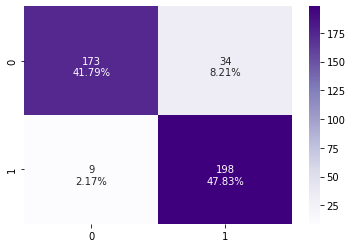

In [ ]:
Kfold_result(X,Y,eclfs,10)

In [ ]:
# AUC
from sklearn.metrics import roc_auc_score, roc_curve
eclfs.fit(X,Y)
es_probs_y = eclfs.predict_proba(X)
es_auc_y = roc_auc_score(Y, es_probs_y[:,1])
es_fpr, es_tpr, threshold = roc_curve(Y,es_probs_y[:,1])
print(es_auc_y)

1.0


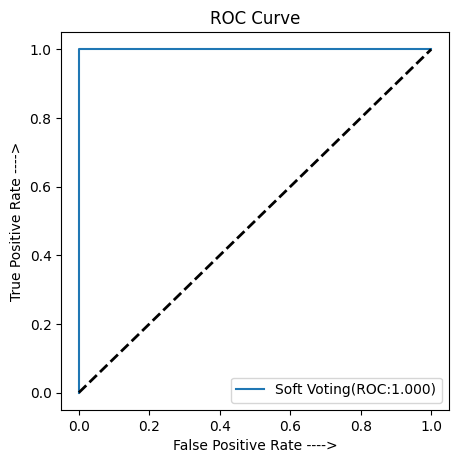

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure(figsize=(5,5),dpi = 100)
plt.plot(es_fpr,es_tpr,linestyle='-',label='Soft Voting(ROC:%0.3f)' % es_auc_y)
lw=2
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate ---->")
plt.ylabel("True Positive Rate ---->")
plt.legend()
plt.show()

# ROC

In [ ]:
lr_fpr,lr_tpr,_ = roc_curve(Y_test,lr_prob[:,1])
svm_fpr,svm_tpr,_ = roc_curve(Y_test,svm_prob[:,1])
nb_fpr,nb_tpr,_ = roc_curve(Y_test,nb_prob[:,1])
dt_fpr,dt_tpr,_ = roc_curve(Y_test,dt_prob[:,1])
rf_fpr,rf_tpr,_ = roc_curve(Y_test,rf_prob[:,1])
et_fpr,et_tpr,_ = roc_curve(Y_test,et_prob[:,1])


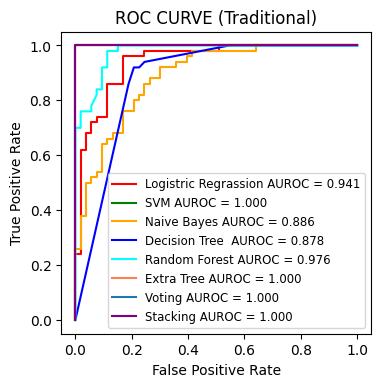

In [ ]:
plt.figure(figsize=(4,4),dpi = 100)
plt.plot(lr_fpr, lr_tpr, color = 'red', linestyle='-',label='Logistric Regrassion AUROC = %0.3f'% lr_auc)
plt.plot(svm_fpr, svm_tpr, color = 'green', linestyle='-',label='SVM AUROC = %0.3f'% svm_auc)
plt.plot(nb_fpr, nb_tpr, color = 'orange', linestyle='-',label='Naive Bayes AUROC = %0.3f'% nb_auc)
plt.plot(dt_fpr, dt_tpr, color = 'blue', linestyle='-',label='Decision Tree  AUROC = %0.3f'% dt_auc)
plt.plot(rf_fpr, rf_tpr, color = 'cyan', linestyle='-',label='Random Forest AUROC = %0.3f'% rf_auc)
plt.plot(et_fpr, et_tpr, color = 'coral', linestyle='-',label='Extra Tree AUROC = %0.3f'% et_auc)
plt.plot(es_fpr,es_tpr,linestyle='-',label='Voting AUROC = %0.3f' % es_auc_y)
plt.plot(st_fpr,st_tpr,color = 'purple', linestyle='-',label='Stacking AUROC = %0.3f' % st_auc_y)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE (Traditional)')
plt.legend(loc=4, prop={'size': 8.5})
plt.show()

# Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

## Hyper parameter Tuning

### Bagging Logistic Regression Random Search

In [ ]:
grs = RandomizedSearchCV(BaggingClassifier(),{
    'base_estimator' : [LogisticRegression(solver='liblinear',multi_class='auto')],
    'bootstrap_features': ['True','False',None],
    'n_estimators' : [i for i in range(1,100,1)],
    'n_jobs' : [1,2,3,4,5]
})
grs.fit(X,Y)
best_paramgrs = grs.best_params_
pd.DataFrame(grs.cv_results_)[['param_bootstrap_features','param_n_estimators','param_n_jobs','mean_test_score']]

,param_bootstrap_features,param_n_estimators,param_n_jobs,mean_test_score
0,False,28,4,0.821599
1,None,13,3,0.802175
2,None,14,1,0.816632
3,False,34,1,0.804702
4,False,84,5,0.814370
5,None,51,1,0.814223
6,None,90,3,0.816632
7,None,18,3,0.814223
8,False,47,4,0.816779
9,True,62,2,0.819160


### Bagging KNN Random Search

In [ ]:
kgrs = RandomizedSearchCV(BaggingClassifier(),{
    'base_estimator' : [KNeighborsClassifier()],
    'bootstrap_features': ['True','False',None],
    'n_estimators' : [i for i in range(1,100,1)],
    'n_jobs' : [1,2,3,4,5]
})
kgrs.fit(X_train,Y_train)
pd.DataFrame(kgrs.cv_results_)[['param_bootstrap_features','param_n_estimators','param_n_jobs','mean_test_score']]


,param_bootstrap_features,param_n_estimators,param_n_jobs,mean_test_score
0,True,52,4,0.809677
1,True,35,2,0.819355
2,True,70,1,0.809677
3,None,64,4,0.800000
4,False,6,3,0.803226
5,False,2,2,0.754839
6,False,54,4,0.806452
7,False,8,1,0.838710
8,None,10,3,0.809677
9,None,64,3,0.803226


### Bagging SVM Random Search

In [ ]:
sgrs = RandomizedSearchCV(BaggingClassifier(),{
    'base_estimator' : [SVC()],
    'bootstrap_features': ['True','False',None],
    'n_estimators' : [i for i in range(1,100,1)],
    'n_jobs' : [1,2,3,4,5]
})
sgrs.fit(X,Y)
best_paramsgrs = sgrs.best_params_
pd.DataFrame(grs.cv_results_)[['param_bootstrap_features','param_n_estimators','param_n_jobs','mean_test_score']]
print(best_paramsgrs)

{'n_jobs': 5, 'n_estimators': 56, 'bootstrap_features': None, 'base_estimator': SVC()}


### Bagging Naive Bayes Random Search

In [ ]:
nbgrs = RandomizedSearchCV(BaggingClassifier(),{
    'base_estimator' : [GaussianNB()],
    'bootstrap_features': ['True','False',None],
    'n_estimators' : [i for i in range(1,100,1)],
    'n_jobs' : [1,2,3,4,5]
})
nbgrs.fit(X,Y)
best_paramnbgrs = nbgrs.best_params_
pd.DataFrame(nbgrs.cv_results_)[['param_bootstrap_features','param_n_estimators','param_n_jobs','mean_test_score']]

,param_bootstrap_features,param_n_estimators,param_n_jobs,mean_test_score
0,False,99,2,0.826418
1,False,53,3,0.816779
2,True,71,1,0.824008
3,True,56,4,0.826418
4,None,95,5,0.824008
5,None,49,4,0.821599
6,True,17,4,0.811960
7,False,86,2,0.824008
8,None,35,2,0.824008
9,True,39,3,0.819189


### Bagging Decision Tree Random Search

In [ ]:
dtgrs = RandomizedSearchCV(BaggingClassifier(),{
    'base_estimator' : [DecisionTreeClassifier()],
    'bootstrap_features': ['True','False',None],
    'n_estimators' : [i for i in range(1,100,1)],
    'n_jobs' : [1,2,3,4,5]
})
dtgrs.fit(X,Y)
best_paramdtgrs = dtgrs.best_params_
pd.DataFrame(dtgrs.cv_results_)[['param_bootstrap_features','param_n_estimators','param_n_jobs','mean_test_score']]

,param_bootstrap_features,param_n_estimators,param_n_jobs,mean_test_score
0,None,81,1,0.855304
1,None,27,4,0.848105
2,None,33,2,0.852924
3,False,29,1,0.874640
4,True,92,3,0.874669
5,True,2,3,0.753776
6,True,63,3,0.874640
7,None,17,2,0.843285
8,None,15,2,0.838495
9,None,24,3,0.848134


### Bagging Random Forest Random Search

In [ ]:
rfgrs = RandomizedSearchCV(BaggingClassifier(),{
    'base_estimator' : [RandomForestClassifier()],
    'bootstrap_features': ['True','False',None],
    'n_estimators' : [i for i in range(1,100,1)],
    'n_jobs' : [1,2,3,4,5]
})
rfgrs.fit(X,Y)
best_paramrfgrs = rfgrs.best_params_
pd.DataFrame(rfgrs.cv_results_)[['param_bootstrap_features','param_n_estimators','param_n_jobs','mean_test_score']]

,param_bootstrap_features,param_n_estimators,param_n_jobs,mean_test_score
0,True,26,4,0.850573
1,True,58,2,0.857773
2,True,50,1,0.848134
3,False,76,4,0.865001
4,False,89,3,0.852983
5,False,62,5,0.865031
6,True,40,3,0.852953
7,None,55,1,0.857773
8,True,21,3,0.862621
9,None,80,3,0.855363


### Bagging Extra Tree Random Search

In [ ]:
etgrs = RandomizedSearchCV(BaggingClassifier(),{
    'base_estimator' : [ExtraTreeClassifier()],
    'bootstrap_features': ['True','False',None],
    'n_estimators' : [i for i in range(1,100,1)],
    'n_jobs' : [1,2,3,4,5]
})
etgrs.fit(X,Y)
best_parametgrs = etgrs.best_params_
pd.DataFrame(etgrs.cv_results_)[['param_bootstrap_features','param_n_estimators','param_n_jobs','mean_test_score']]

,param_bootstrap_features,param_n_estimators,param_n_jobs,mean_test_score
0,None,67,5,0.964117
1,False,53,4,0.947603
2,True,5,4,0.955784
3,None,76,1,0.953082
4,False,31,5,0.947527
5,True,86,3,0.947527
6,False,48,5,0.955860
7,None,74,3,0.953082
8,None,77,4,0.955822
9,None,48,3,0.947565


## Base estimator Logistric Regression

In [ ]:
bag = BaggingClassifier(classifier,n_estimators= best_paramgrs['n_estimators'],bootstrap_features=best_paramgrs['bootstrap_features'],
                        n_jobs=best_paramgrs['n_jobs'],random_state=42)

In [ ]:
bag.fit(X,Y)

BaggingClassifier(base_estimator=LogisticRegression(C=1, random_state=42),
                  bootstrap_features='False', n_estimators=28, n_jobs=4,
                  random_state=42)

In [ ]:
Y_predbglr = bag.predict(X_test)

In [ ]:
Y_cvpredbglr = cross_val_predict(bag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbglr)
print(cm)

[[41 12]
 [ 1 50]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbglr)
print(cmbg)

[[149  58]
 [  8 199]]


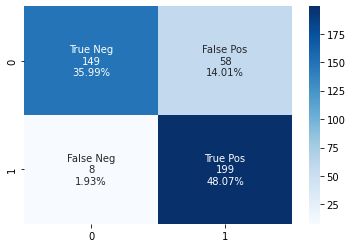

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(bag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.52380952 0.52380952 0.61904762 0.92857143 0.97560976 1.
 0.92682927 1.         0.95121951 0.97560976]

Cross Val Accuracy : 0.842450638792102


In [ ]:
cvresult(Y,Y_cvpredbglr)

Cross Val f1 score :  0.8577586206896551
Cross Val Precision :  0.77431906614786
Cross Val recall :  0.961352657004831
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.72      0.82       207
           1       0.77      0.96      0.86       207

    accuracy                           0.84       414
   macro avg       0.86      0.84      0.84       414
weighted avg       0.86      0.84      0.84       414



In [ ]:
result(Y_test,Y_predbglr)

Accuracy :  0.875
f1 score :  0.8849557522123893
Precision :  0.8064516129032258
recall :  0.9803921568627451
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.77      0.86        53
           1       0.81      0.98      0.88        51

    accuracy                           0.88       104
   macro avg       0.89      0.88      0.87       104
weighted avg       0.89      0.88      0.87       104



In [ ]:
lrbg_prob = bag.predict_proba(X_test)
lrbg_auc = roc_auc_score(Y_test,lrbg_prob[:,1])
print('roc-auc score :{}'.format(lrbg_auc))

roc-auc score :0.9404365519792823


## Base estimator K-NN

In [ ]:
kbag = BaggingClassifier(kclassifier, n_estimators= 75,bootstrap_features=False,n_jobs=3)

In [ ]:
kbag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=1,
                                                      metric='euclidean',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=1,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=75, n_jobs=3, oob_score=False,
                  random_state=None, verbose=0, warm_start=False)

In [ ]:
Y_predbgk = kbag.predict(X_test)

In [ ]:
Y_cvpredbgk = cross_val_predict(kbag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbgk)
print(cm)

[[36  1]
 [ 1 53]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbgk)
print(cmbg)

[[171  10]
 [  3 178]]


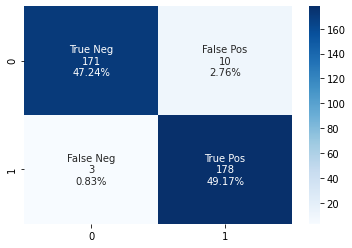

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(kbag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.89189189 1.         0.97222222 1.         0.97222222 0.97222222
 0.88888889 1.         0.94444444 1.        ]

Cross Val Accuracy : 0.9641891891891892


In [ ]:
cvresult(Y,Y_cvpredbgk)

Cross Val f1 score :  0.964769647696477
Cross Val Precision :  0.9468085106382979
Cross Val recall :  0.9834254143646409
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       181
           1       0.95      0.98      0.96       181

    accuracy                           0.96       362
   macro avg       0.96      0.96      0.96       362
weighted avg       0.96      0.96      0.96       362



In [ ]:
result(Y_test,Y_predbgk)

Accuracy :  0.978021978021978
f1 score :  0.9814814814814815
Precision :  0.9814814814814815
recall :  0.9814814814814815
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        37
           1       0.98      0.98      0.98        54

    accuracy                           0.98        91
   macro avg       0.98      0.98      0.98        91
weighted avg       0.98      0.98      0.98        91



In [ ]:
knnbg_prob = kbag.predict_proba(X_test)
knnbg_auc = roc_auc_score(Y_test,knnbg_prob[:,1])
print('roc-auc score :{}'.format(knnbg_auc))

roc-auc score :0.9994994994994995


## Base estimator SVM

In [ ]:
sbag = BaggingClassifier(sclassifier, n_estimators= best_paramsgrs['n_estimators'],bootstrap_features=best_paramsgrs['bootstrap_features'],
                          n_jobs= best_paramsgrs['n_jobs'],random_state=42)

In [ ]:
sbag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=SVC(C=50, probability=True, random_state=42),
                  bootstrap_features=None, n_estimators=56, n_jobs=5,
                  random_state=42)

In [ ]:
Y_predbgs = sbag.predict(X_test)

In [ ]:
Y_cvpredbgs = cross_val_predict(sbag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbgs)
print(cm)

[[43 10]
 [ 7 44]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbgs)
print(cmbg)

[[172  35]
 [ 11 196]]


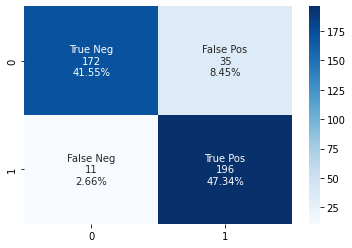

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(sbag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.71428571 0.71428571 0.83333333 0.9047619  0.80487805 0.97560976
 0.97560976 0.97560976 1.         1.        ]

Cross Val Accuracy : 0.8898373983739838


In [ ]:
cvresult(Y,Y_cvpredbgs)

Cross Val f1 score :  0.8949771689497718
Cross Val Precision :  0.8484848484848485
Cross Val recall :  0.9468599033816425
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.83      0.88       207
           1       0.85      0.95      0.89       207

    accuracy                           0.89       414
   macro avg       0.89      0.89      0.89       414
weighted avg       0.89      0.89      0.89       414



In [ ]:
result(Y_test,Y_predbgs)

Accuracy :  0.8365384615384616
f1 score :  0.838095238095238
Precision :  0.8148148148148148
recall :  0.8627450980392157
Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.81      0.83        53
           1       0.81      0.86      0.84        51

    accuracy                           0.84       104
   macro avg       0.84      0.84      0.84       104
weighted avg       0.84      0.84      0.84       104



In [ ]:
svmbg_prob = sbag.predict_proba(X_test)
svmbg_auc = roc_auc_score(Y_test,svmbg_prob[:,1])
print('roc-auc score :{}'.format(svmbg_auc))

roc-auc score :0.9208287088420275


## Base estimator kernal SVM

In [ ]:
ksbag = BaggingClassifier(ksclassifier, n_estimators= 75,bootstrap_features=True,n_jobs=3)

In [ ]:
ksbag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=SVC(C=1, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='linear',
                                     max_iter=-1, probability=True,
                                     random_state=0, shrinking=True, tol=0.001,
                                     verbose=False),
                  bootstrap=True, bootstrap_features=True, max_features=1.0,
                  max_samples=1.0, n_estimators=75, n_jobs=3, oob_score=False,
                  random_state=None, verbose=0, warm_start=False)

In [ ]:
Y_predbgks = ksbag.predict(X_test)

In [ ]:
Y_cvpredbgks = cross_val_predict(ksbag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbgks)
print(cm)

[[37  0]
 [ 0 54]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbgks)
print(cmbg)

[[171  10]
 [  2 179]]


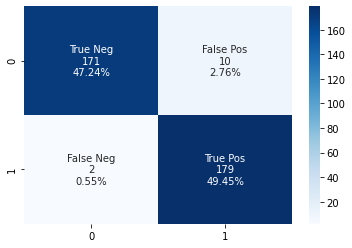

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(ksbag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.89189189 1.         0.97222222 1.         0.97222222 1.
 0.88888889 1.         0.94444444 1.        ]

Cross Val Accuracy : 0.9669669669669669


In [ ]:
cvresult(Y,Y_cvpredbgks)

Cross Val f1 score :  0.9675675675675676
Cross Val Precision :  0.9470899470899471
Cross Val recall :  0.988950276243094
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       181
           1       0.95      0.99      0.97       181

    accuracy                           0.97       362
   macro avg       0.97      0.97      0.97       362
weighted avg       0.97      0.97      0.97       362



In [ ]:
result(Y_test,Y_predks)

Accuracy :  1.0
f1 score :  1.0
Precision :  1.0
recall :  1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        54

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91



In [ ]:
ksvmbg_prob = ksbag.predict_proba(X_test)
ksvmbg_auc = roc_auc_score(Y_test,ksvmbg_prob[:,1])
print('roc-auc score :{}'.format(ksvmbg_auc))

roc-auc score :1.0


## Base estimator Naive Bayes

In [ ]:
nbbag = BaggingClassifier(nbclassifier, n_estimators= best_paramnbgrs['n_estimators'],
                          bootstrap_features=best_paramnbgrs['bootstrap_features'],
                          n_jobs=best_paramnbgrs['n_jobs'],random_state=42)

In [ ]:
nbbag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=GaussianNB(priors=None, var_smoothing=0.01),
                  bootstrap=True, bootstrap_features='True', max_features=1.0,
                  max_samples=1.0, n_estimators=72, n_jobs=4, oob_score=False,
                  random_state=42, verbose=0, warm_start=False)

In [ ]:
Y_predbgnb = nbbag.predict(X_test)

In [ ]:
Y_cvpredbgnb = cross_val_predict(nbbag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbgnb)
print(cm)

[[37  0]
 [ 1 53]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbgnb)
print(cmbg)

[[173   8]
 [  4 177]]


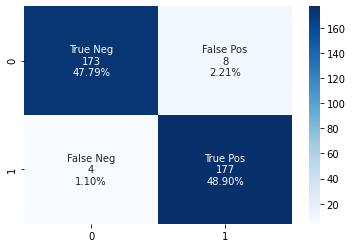

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(nbbag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.89189189 1.         0.97222222 1.         0.97222222 1.
 0.94444444 0.97222222 0.94444444 0.97222222]

Cross Val Accuracy : 0.9669669669669669


In [ ]:
cvresult(Y,Y_cvpredbgnb)

Cross Val f1 score :  0.9672131147540983
Cross Val Precision :  0.9567567567567568
Cross Val recall :  0.9779005524861878
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       181
           1       0.96      0.98      0.97       181

    accuracy                           0.97       362
   macro avg       0.97      0.97      0.97       362
weighted avg       0.97      0.97      0.97       362



In [ ]:
result(Y_test,Y_predbgnb)

Accuracy :  0.989010989010989
f1 score :  0.9906542056074767
Precision :  1.0
recall :  0.9814814814814815
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.98      0.99        54

    accuracy                           0.99        91
   macro avg       0.99      0.99      0.99        91
weighted avg       0.99      0.99      0.99        91



In [ ]:
nbbg_prob = nbbag.predict_proba(X_test)
nbbg_auc = roc_auc_score(Y_test,nbbg_prob[:,1])
print('roc-auc score :{}'.format(nbbg_auc))

roc-auc score :1.0


## Base estimator Decision Tree

In [ ]:
dtbag = BaggingClassifier(dtclassifier, n_estimators= best_paramdtgrs['n_estimators'],bootstrap_features=best_paramdtgrs['bootstrap_features'],
                          n_jobs=best_paramdtgrs['n_jobs'],random_state =42)

In [ ]:
dtbag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=1,
                                                        max_features=None,
                                                        max_leaf_nodes=70,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=4,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
       

In [ ]:
Y_predbgdt = dtbag.predict(X_test)

In [ ]:
Y_cvpredbgdt = cross_val_predict(dtbag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbgdt)
print(cm)

[[37  0]
 [ 2 52]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbgdt)
print(cmbg)

[[171  10]
 [  2 179]]


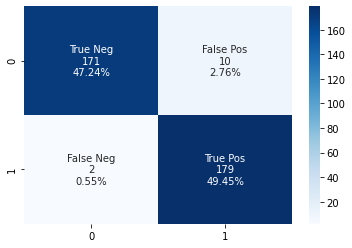

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(dtbag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.89189189 1.         0.97222222 1.         0.97222222 1.
 0.88888889 1.         0.94444444 1.        ]

Cross Val Accuracy : 0.9669669669669669


In [ ]:
cvresult(Y,Y_cvpredbgdt)

Cross Val f1 score :  0.9675675675675676
Cross Val Precision :  0.9470899470899471
Cross Val recall :  0.988950276243094
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       181
           1       0.95      0.99      0.97       181

    accuracy                           0.97       362
   macro avg       0.97      0.97      0.97       362
weighted avg       0.97      0.97      0.97       362



In [ ]:
result(Y_test,Y_predbgdt)

Accuracy :  0.978021978021978
f1 score :  0.9811320754716981
Precision :  1.0
recall :  0.9629629629629629
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       1.00      0.96      0.98        54

    accuracy                           0.98        91
   macro avg       0.97      0.98      0.98        91
weighted avg       0.98      0.98      0.98        91



In [ ]:
dtbg_prob = dtbag.predict_proba(X_test)
dtbg_auc = roc_auc_score(Y_test,dtbg_prob[:,1])
print('roc-auc score :{}'.format(dtbg_auc))

roc-auc score :1.0


## Base estimator Random Forest

In [ ]:
rfbag = BaggingClassifier(rfclassifier, n_estimators= best_paramrfgrs['n_estimators'],bootstrap_features=best_paramrfgrs['bootstrap_features'],
                          n_jobs=best_paramrfgrs['n_jobs'],random_state=42)

In [ ]:
rfbag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features='log2',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
        

In [ ]:
Y_predbgrf = rfbag.predict(X_test)

In [ ]:
Y_cvpredbgrf = cross_val_predict(rfbag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbgrf)
print(cm)

[[37  0]
 [ 1 53]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbgrf)
print(cmbg)

[[172   9]
 [  4 177]]


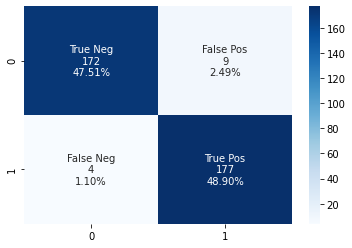

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(rfbag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.89189189 1.         0.97222222 1.         0.97222222 0.97222222
 0.88888889 1.         0.94444444 1.        ]

Cross Val Accuracy : 0.9641891891891892


In [ ]:
cvresult(Y,Y_cvpredbgrf)

Cross Val f1 score :  0.9645776566757494
Cross Val Precision :  0.9516129032258065
Cross Val recall :  0.9779005524861878
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       181
           1       0.95      0.98      0.96       181

    accuracy                           0.96       362
   macro avg       0.96      0.96      0.96       362
weighted avg       0.96      0.96      0.96       362



In [ ]:
result(Y_test,Y_predbgrf)

Accuracy :  0.989010989010989
f1 score :  0.9906542056074767
Precision :  1.0
recall :  0.9814814814814815
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.98      0.99        54

    accuracy                           0.99        91
   macro avg       0.99      0.99      0.99        91
weighted avg       0.99      0.99      0.99        91



In [ ]:
rfbg_prob = rfbag.predict_proba(X_test)
rfbg_auc = roc_auc_score(Y_test,rfbg_prob[:,1])
print('roc-auc score :{}'.format(rfbg_auc))

roc-auc score :0.9994994994994995


## Base estimator Extra Tree

In [ ]:
etbag = BaggingClassifier(etclassifier, n_estimators= best_parametgrs['n_estimators'],
                          bootstrap_features=best_parametgrs['bootstrap_features'],n_jobs=best_parametgrs['n_jobs'],random_state=42)

In [ ]:
etbag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=ExtraTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=19,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     random_state=42,
                                                     splitter='random'),
                  bootstrap=True, bootstrap

In [ ]:
Y_predbget = etbag.predict(X_test)

In [ ]:
Y_cvpredbget = cross_val_predict(etbag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbget)
print(cm)

[[37  0]
 [ 2 52]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbget)
print(cmbg)

[[173   8]
 [  8 173]]


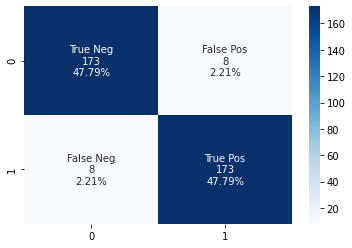

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(etbag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.86486486 1.         1.         0.97222222 0.91666667 0.94444444
 0.88888889 1.         0.97222222 1.        ]

Cross Val Accuracy : 0.955930930930931


In [ ]:
cvresult(Y,Y_cvpredbget)

Cross Val f1 score :  0.9558011049723757
Cross Val Precision :  0.9558011049723757
Cross Val recall :  0.9558011049723757
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       181
           1       0.96      0.96      0.96       181

    accuracy                           0.96       362
   macro avg       0.96      0.96      0.96       362
weighted avg       0.96      0.96      0.96       362



In [ ]:
result(Y_test,Y_predbget)

Accuracy :  0.978021978021978
f1 score :  0.9811320754716981
Precision :  1.0
recall :  0.9629629629629629
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       1.00      0.96      0.98        54

    accuracy                           0.98        91
   macro avg       0.97      0.98      0.98        91
weighted avg       0.98      0.98      0.98        91



In [ ]:
etbg_prob = etbag.predict_proba(X_test)
etbg_auc = roc_auc_score(Y_test,etbg_prob[:,1])
print('roc-auc score :{}'.format(etbg_auc))

roc-auc score :0.9997497497497497


## ROC AUC CURVE  (Bagging)

In [ ]:
lrg_fpr,lrg_tpr,_ = roc_curve(Y_test,lrbg_prob[:,1])
svmg_fpr,svmg_tpr,_ = roc_curve(Y_test,svmbg_prob[:,1])
nbg_fpr,nbg_tpr,_ = roc_curve(Y_test,nbbg_prob[:,1])
dtg_fpr,dtg_tpr,_ = roc_curve(Y_test,dtbg_prob[:,1])
rfg_fpr,rfg_tpr,_ = roc_curve(Y_test,rfbg_prob[:,1])
etg_fpr,etg_tpr,_ = roc_curve(Y_test,etbg_prob[:,1])

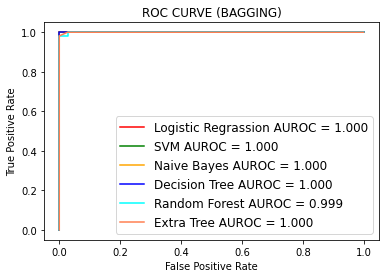

In [ ]:
plt.plot(lrg_fpr, lrg_tpr, color = 'red', linestyle='-',label='Logistic Regrassion AUROC = %0.3f'% lrbg_auc)
plt.plot(svmg_fpr, svmg_tpr, color = 'green', linestyle='-',label='SVM AUROC = %0.3f'% svmbg_auc)
plt.plot(nbg_fpr, nbg_tpr, color = 'orange', linestyle='-',label='Naive Bayes AUROC = %0.3f'% nbbg_auc)
plt.plot(dtg_fpr, dtg_tpr, color = 'blue', linestyle='-',label='Decision Tree AUROC = %0.3f'% dtbg_auc)
plt.plot(rfg_fpr, rfg_tpr, color = 'cyan', linestyle='-',label='Random Forest AUROC = %0.3f'% rfbg_auc)
plt.plot(etg_fpr, etg_tpr, color = 'Coral', linestyle='-',label='Extra Tree AUROC = %0.3f'% etbg_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE (BAGGING)')
plt.legend(loc=4, prop={'size': 12})
plt.show()